In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_fp9 = pd.read_csv('../data/fp9.csv')
df_fp9.head()

,Unnamed: 0,game_id,date,duration,platform,p1_port,p1_char,p2_port,p2_char,stage,is_teams,is_pal
0,0,20190406T182021,2019-04-06 18:20:21+00:00,11653,Platform.NINTENDONT,0,14,3,9,32,False,False
1,1,20190406T054329,2019-04-06 05:43:29+00:00,1435,Platform.NINTENDONT,1,20,2,18,31,False,False
2,2,20190406T113710,2019-04-06 11:37:10+00:00,7577,Platform.NINTENDONT,0,22,1,2,3,True,False
3,3,20190406T060932,2019-04-06 06:09:32+00:00,9589,Platform.NINTENDONT,0,20,3,7,28,False,False
4,4,20190406T063208,2019-04-06 06:32:08+00:00,10043,Platform.NINTENDONT,0,14,3,9,8,False,False


In [3]:
df_fp9.drop(columns = ['Unnamed: 0'], inplace = True)
df_fp9.head()

,game_id,date,duration,platform,p1_port,p1_char,p2_port,p2_char,stage,is_teams,is_pal
0,20190406T182021,2019-04-06 18:20:21+00:00,11653,Platform.NINTENDONT,0,14,3,9,32,False,False
1,20190406T054329,2019-04-06 05:43:29+00:00,1435,Platform.NINTENDONT,1,20,2,18,31,False,False
2,20190406T113710,2019-04-06 11:37:10+00:00,7577,Platform.NINTENDONT,0,22,1,2,3,True,False
3,20190406T060932,2019-04-06 06:09:32+00:00,9589,Platform.NINTENDONT,0,20,3,7,28,False,False
4,20190406T063208,2019-04-06 06:32:08+00:00,10043,Platform.NINTENDONT,0,14,3,9,8,False,False


In [4]:
df_fp9.shape

(1146, 11)

In [5]:
df_fp9.set_index('game_id', inplace = True)
df_fp9.head()

,date,duration,platform,p1_port,p1_char,p2_port,p2_char,stage,is_teams,is_pal
game_id,,,,,,,,,,
20190406T182021,2019-04-06 18:20:21+00:00,11653,Platform.NINTENDONT,0,14,3,9,32,False,False
20190406T054329,2019-04-06 05:43:29+00:00,1435,Platform.NINTENDONT,1,20,2,18,31,False,False
20190406T113710,2019-04-06 11:37:10+00:00,7577,Platform.NINTENDONT,0,22,1,2,3,True,False
20190406T060932,2019-04-06 06:09:32+00:00,9589,Platform.NINTENDONT,0,20,3,7,28,False,False
20190406T063208,2019-04-06 06:32:08+00:00,10043,Platform.NINTENDONT,0,14,3,9,8,False,False


In [9]:
csscharacter = {
    0: 'Captain Falcon',
    1: 'Donkey Kong',
    2: 'Fox',
    3: 'Game and Watch',
    4: 'Kirby',
    5: 'Bowser',
    6: 'Link',
    7: 'Luigi',
    8: 'Mario',
    9: 'Marth',
    10: 'Mewtwo',
    11: 'Ness',
    12: 'Peach',
    13: 'Pikachu',
    14: 'Ice Climbers',
    15: 'Jigglypuff',
    16: 'Samus',
    17: 'Yoshi',
    18: 'Zelda',
    19: 'Sheik',
    20: 'Falco',
    21: 'Young Link',
    22: 'Dr. Mario',
    23: 'Roy',
    24: 'Pichu',
    25: 'Ganondorf'
}

df_fp9['p1_char_name'] = df_fp9['p1_char'].map(csscharacter)
df_fp9['p2_char_name'] = df_fp9['p2_char'].map(csscharacter)
df_fp9.head()

,date,duration,platform,p1_port,p1_char,p2_port,p2_char,stage,is_teams,is_pal,p1_char_name,p2_char_name,stage_name
game_id,,,,,,,,,,,,,
20190406T182021,2019-04-06 18:20:21+00:00,11653,Platform.NINTENDONT,0,14,3,9,32,False,False,Ice Climbers,Marth,Final Destination
20190406T054329,2019-04-06 05:43:29+00:00,1435,Platform.NINTENDONT,1,20,2,18,31,False,False,Falco,Zelda,Battlefield
20190406T113710,2019-04-06 11:37:10+00:00,7577,Platform.NINTENDONT,0,22,1,2,3,True,False,Dr. Mario,Fox,Pokemon Stadium
20190406T060932,2019-04-06 06:09:32+00:00,9589,Platform.NINTENDONT,0,20,3,7,28,False,False,Falco,Luigi,Dream Land 64
20190406T063208,2019-04-06 06:32:08+00:00,10043,Platform.NINTENDONT,0,14,3,9,8,False,False,Ice Climbers,Marth,Yoshi's Story


In [16]:
all_chars = df_fp9['p1_char_name'].value_counts().append(df_fp9['p2_char_name'].value_counts())
all_chars = all_chars.groupby(all_chars.index).sum().sort_values()
all_chars

Young Link          1
Bowser              2
Mario               4
Ness                5
Mewtwo              6
Kirby               6
Game and Watch      7
Zelda               8
Roy                10
Yoshi              15
Pikachu            16
Link               33
Dr. Mario          33
Luigi              37
Donkey Kong        45
Ice Climbers       51
Ganondorf          59
Peach              93
Sheik             123
Jigglypuff        123
Samus             130
Captain Falcon    193
Falco             365
Marth             444
Fox               483
dtype: int64

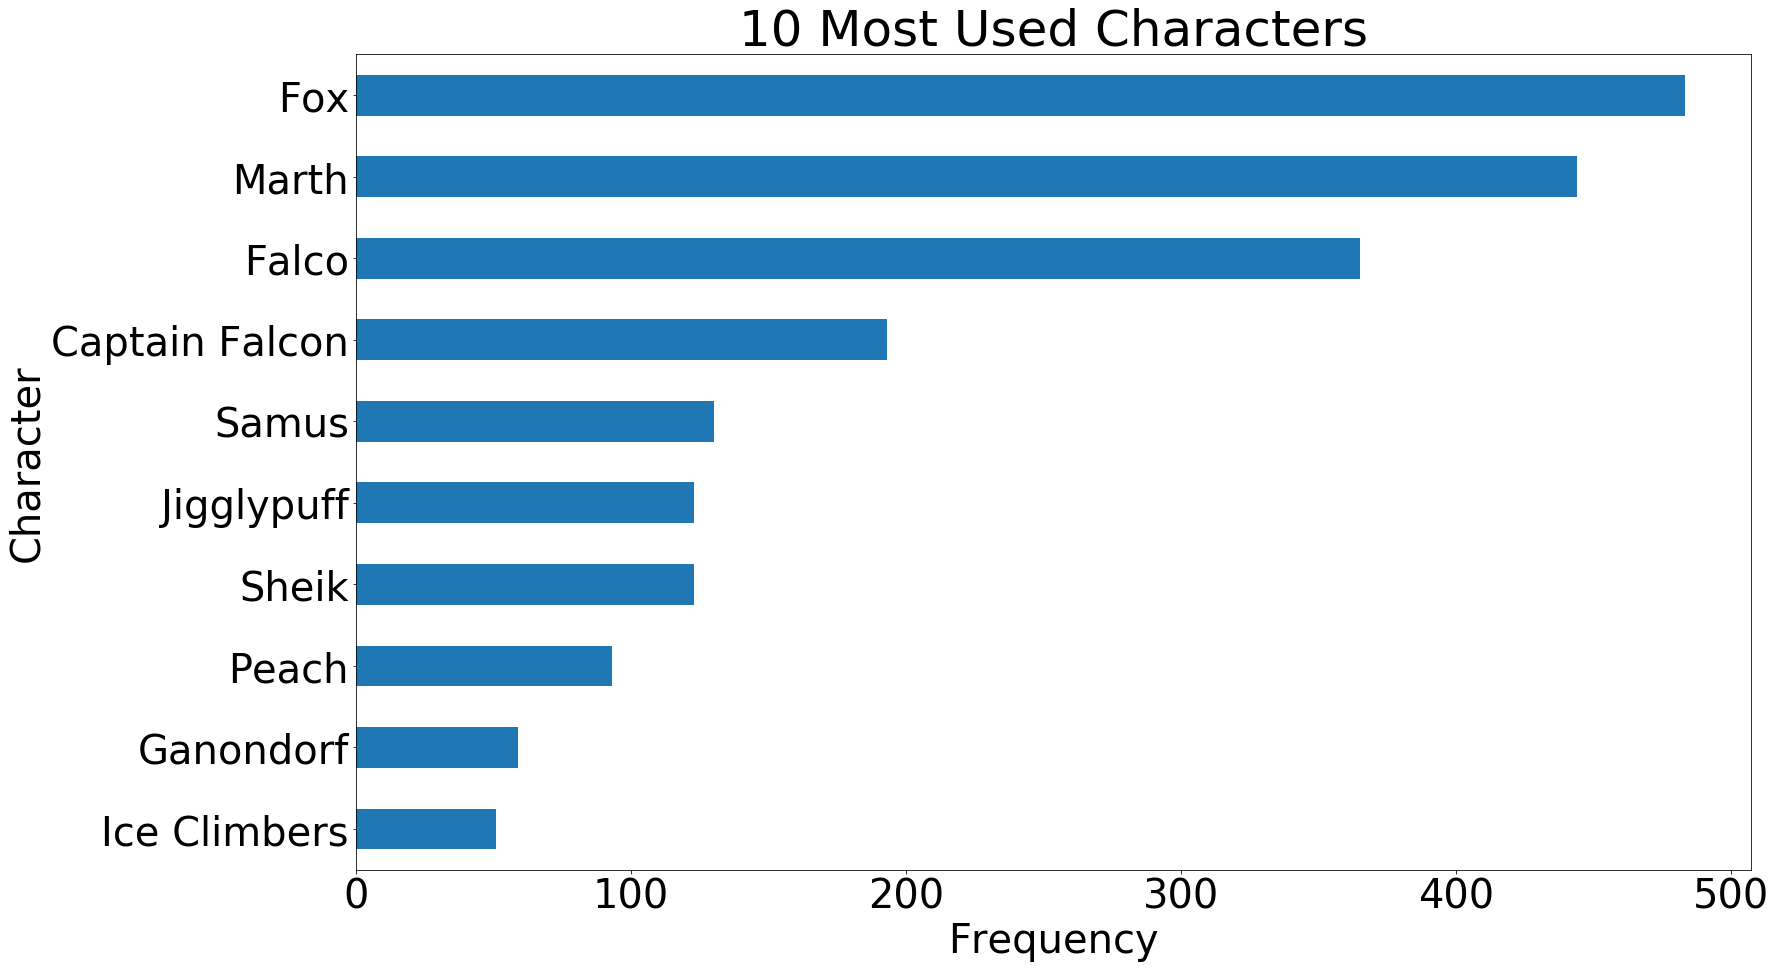

In [109]:
plt.figure(figsize = (25, 15))
plt.title('10 Most Used Characters', size = 50)
plt.ylabel('Character', size = 40)
plt.xlabel('Frequency', size = 40)
plt.xticks(size = 40)
plt.yticks(size = 40)
all_chars[-10:].plot(kind = 'barh')

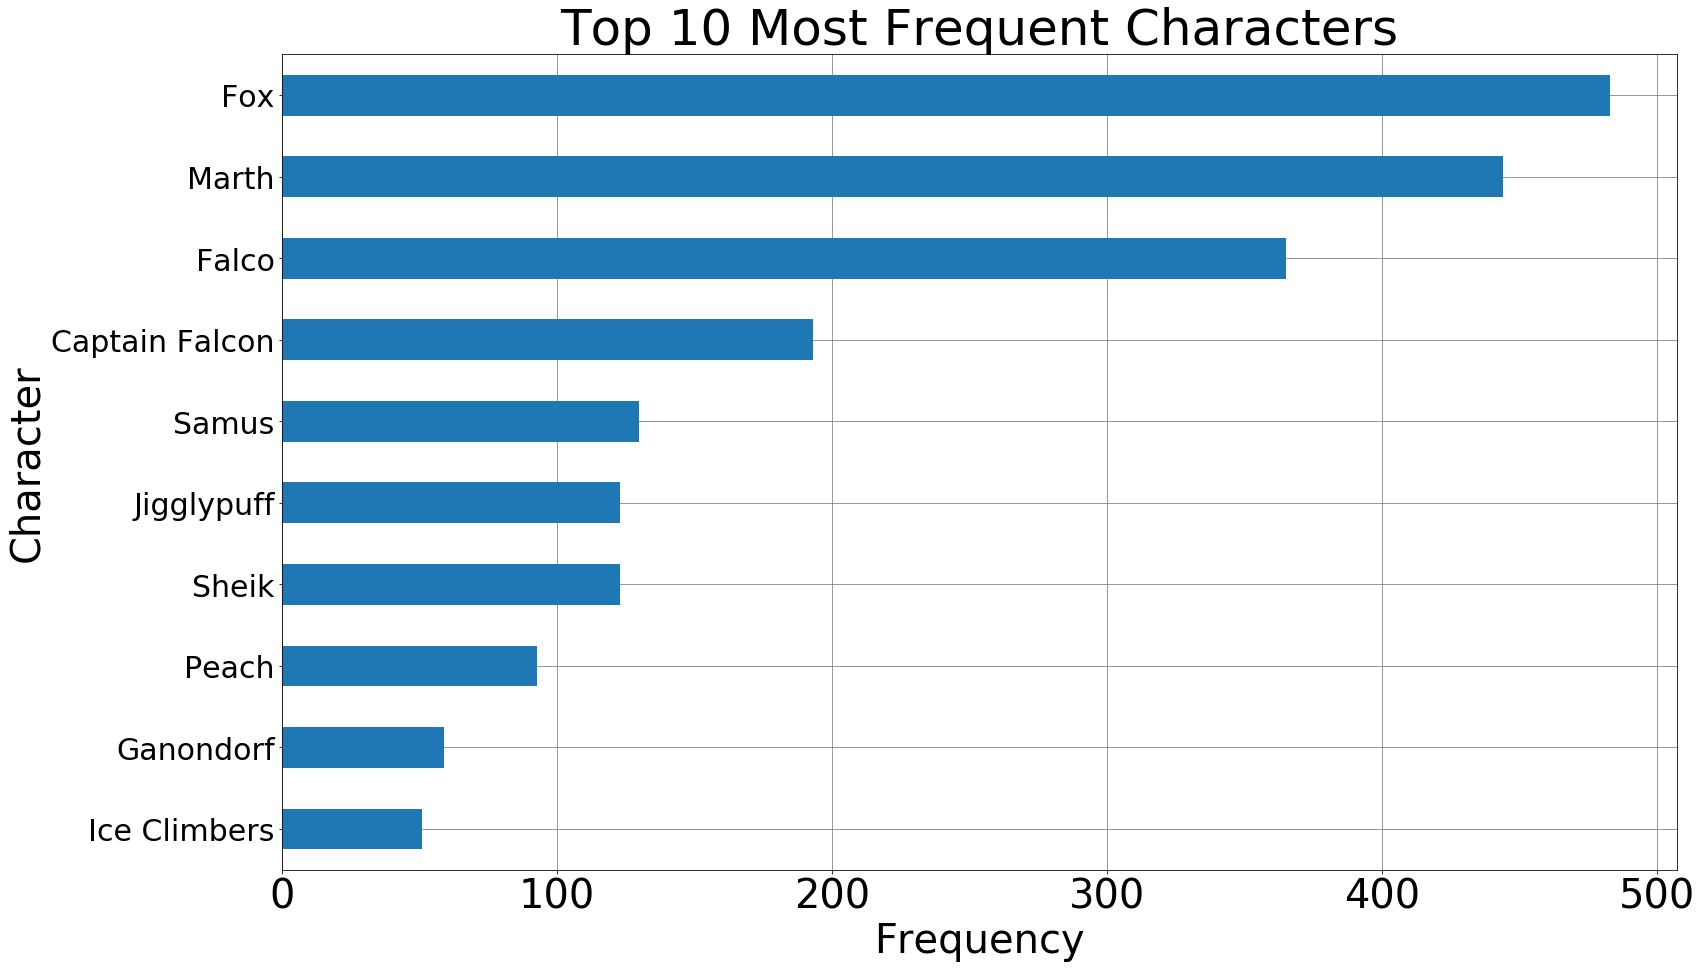

In [112]:
fig, ax = plt.subplots(figsize = (25, 15))
all_chars[-10:].plot(kind = 'barh', ax = ax)
ax.set_axisbelow(True)
ax.grid(color = 'grey')
ax.set_title('Top 10 Most Frequent Characters', size = 50)
ax.set_xlabel('Frequency', size = 40)
ax.set_ylabel('Character', size  = 40)
ax.tick_params(axis = 'x', labelsize = 40)
ax.tick_params(axis = 'y', labelsize = 30)

In [114]:
df_fp9.shape

(1146, 13)

In [43]:
matchups = [[matchup[0], matchup[1]] for matchup in df_fp9[['p1_char_name', 'p2_char_name']].values]
matchups

[['Ice Climbers', 'Marth'],
 ['Falco', 'Zelda'],
 ['Dr. Mario', 'Fox'],
 ['Falco', 'Luigi'],
 ['Ice Climbers', 'Marth'],
 ['Samus', 'Samus'],
 ['Sheik', 'Ganondorf'],
 ['Fox', 'Fox'],
 ['Falco', 'Fox'],
 ['Luigi', 'Falco'],
 ['Fox', 'Captain Falcon'],
 ['Marth', 'Falco'],
 ['Falco', 'Fox'],
 ['Fox', 'Marth'],
 ['Fox', 'Fox'],
 ['Captain Falcon', 'Samus'],
 ['Marth', 'Captain Falcon'],
 ['Sheik', 'Captain Falcon'],
 ['Samus', 'Captain Falcon'],
 ['Fox', 'Zelda'],
 ['Peach', 'Fox'],
 ['Marth', 'Fox'],
 ['Peach', 'Peach'],
 ['Falco', 'Falco'],
 ['Yoshi', 'Zelda'],
 ['Marth', 'Samus'],
 ['Marth', 'Marth'],
 ['Marth', 'Fox'],
 ['Samus', 'Captain Falcon'],
 ['Mario', 'Luigi'],
 ['Falco', 'Ganondorf'],
 ['Falco', 'Link'],
 ['Zelda', 'Peach'],
 ['Falco', 'Falco'],
 ['Sheik', 'Falco'],
 ['Captain Falcon', 'Samus'],
 ['Donkey Kong', 'Marth'],
 ['Falco', 'Captain Falcon'],
 ['Captain Falcon', 'Jigglypuff'],
 ['Captain Falcon', 'Jigglypuff'],
 ['Dr. Mario', 'Yoshi'],
 ['Falco', 'Falco'],
 ['Luigi'

In [54]:
sort_matchups = list(map(sorted, matchups))
sort_matchups

[['Ice Climbers', 'Marth'],
 ['Falco', 'Zelda'],
 ['Dr. Mario', 'Fox'],
 ['Falco', 'Luigi'],
 ['Ice Climbers', 'Marth'],
 ['Samus', 'Samus'],
 ['Ganondorf', 'Sheik'],
 ['Fox', 'Fox'],
 ['Falco', 'Fox'],
 ['Falco', 'Luigi'],
 ['Captain Falcon', 'Fox'],
 ['Falco', 'Marth'],
 ['Falco', 'Fox'],
 ['Fox', 'Marth'],
 ['Fox', 'Fox'],
 ['Captain Falcon', 'Samus'],
 ['Captain Falcon', 'Marth'],
 ['Captain Falcon', 'Sheik'],
 ['Captain Falcon', 'Samus'],
 ['Fox', 'Zelda'],
 ['Fox', 'Peach'],
 ['Fox', 'Marth'],
 ['Peach', 'Peach'],
 ['Falco', 'Falco'],
 ['Yoshi', 'Zelda'],
 ['Marth', 'Samus'],
 ['Marth', 'Marth'],
 ['Fox', 'Marth'],
 ['Captain Falcon', 'Samus'],
 ['Luigi', 'Mario'],
 ['Falco', 'Ganondorf'],
 ['Falco', 'Link'],
 ['Peach', 'Zelda'],
 ['Falco', 'Falco'],
 ['Falco', 'Sheik'],
 ['Captain Falcon', 'Samus'],
 ['Donkey Kong', 'Marth'],
 ['Captain Falcon', 'Falco'],
 ['Captain Falcon', 'Jigglypuff'],
 ['Captain Falcon', 'Jigglypuff'],
 ['Dr. Mario', 'Yoshi'],
 ['Falco', 'Falco'],
 ['Luigi'

In [57]:
sort_matchups = list(map(tuple, sort_matchups))
sort_matchups

[('Ice Climbers', 'Marth'),
 ('Falco', 'Zelda'),
 ('Dr. Mario', 'Fox'),
 ('Falco', 'Luigi'),
 ('Ice Climbers', 'Marth'),
 ('Samus', 'Samus'),
 ('Ganondorf', 'Sheik'),
 ('Fox', 'Fox'),
 ('Falco', 'Fox'),
 ('Falco', 'Luigi'),
 ('Captain Falcon', 'Fox'),
 ('Falco', 'Marth'),
 ('Falco', 'Fox'),
 ('Fox', 'Marth'),
 ('Fox', 'Fox'),
 ('Captain Falcon', 'Samus'),
 ('Captain Falcon', 'Marth'),
 ('Captain Falcon', 'Sheik'),
 ('Captain Falcon', 'Samus'),
 ('Fox', 'Zelda'),
 ('Fox', 'Peach'),
 ('Fox', 'Marth'),
 ('Peach', 'Peach'),
 ('Falco', 'Falco'),
 ('Yoshi', 'Zelda'),
 ('Marth', 'Samus'),
 ('Marth', 'Marth'),
 ('Fox', 'Marth'),
 ('Captain Falcon', 'Samus'),
 ('Luigi', 'Mario'),
 ('Falco', 'Ganondorf'),
 ('Falco', 'Link'),
 ('Peach', 'Zelda'),
 ('Falco', 'Falco'),
 ('Falco', 'Sheik'),
 ('Captain Falcon', 'Samus'),
 ('Donkey Kong', 'Marth'),
 ('Captain Falcon', 'Falco'),
 ('Captain Falcon', 'Jigglypuff'),
 ('Captain Falcon', 'Jigglypuff'),
 ('Dr. Mario', 'Yoshi'),
 ('Falco', 'Falco'),
 ('Luigi'

In [62]:
matchup_count = {matchup: sort_matchups.count(matchup) for matchup in set(sort_matchups)}
matchup_count

{('Ganondorf', 'Marth'): 20,
 ('Captain Falcon', 'Zelda'): 2,
 ('Game and Watch', 'Ganondorf'): 1,
 ('Game and Watch', 'Peach'): 1,
 ('Captain Falcon', 'Donkey Kong'): 6,
 ('Jigglypuff', 'Link'): 4,
 ('Mewtwo', 'Ness'): 1,
 ('Ganondorf', 'Peach'): 5,
 ('Dr. Mario', 'Pikachu'): 3,
 ('Captain Falcon', 'Captain Falcon'): 10,
 ('Captain Falcon', 'Sheik'): 30,
 ('Ice Climbers', 'Peach'): 2,
 ('Samus', 'Samus'): 12,
 ('Fox', 'Roy'): 4,
 ('Fox', 'Samus'): 6,
 ('Game and Watch', 'Jigglypuff'): 1,
 ('Marth', 'Yoshi'): 1,
 ('Fox', 'Luigi'): 7,
 ('Fox', 'Ganondorf'): 9,
 ('Luigi', 'Mewtwo'): 1,
 ('Marth', 'Marth'): 19,
 ('Dr. Mario', 'Peach'): 4,
 ('Peach', 'Peach'): 4,
 ('Falco', 'Mewtwo'): 1,
 ('Falco', 'Marth'): 86,
 ('Ness', 'Young Link'): 1,
 ('Ganondorf', 'Samus'): 3,
 ('Fox', 'Fox'): 51,
 ('Donkey Kong', 'Falco'): 2,
 ('Ice Climbers', 'Jigglypuff'): 10,
 ('Jigglypuff', 'Luigi'): 4,
 ('Kirby', 'Peach'): 1,
 ('Ice Climbers', 'Marth'): 16,
 ('Fox', 'Sheik'): 28,
 ('Game and Watch', 'Ness'): 1

In [70]:
matchup_count = pd.Series(matchup_count)
matchup_count

In [74]:
matchup_count = matchup_count.sort_values()
matchup_count

Falco           Roy             1
Ganondorf       Sheik           1
Ness            Young Link      1
Luigi           Peach           1
Game and Watch  Ness            1
                             ... 
Marth           Samus          47
Fox             Fox            51
Falco           Marth          86
                Fox            97
Fox             Marth         110
Length: 110, dtype: int64

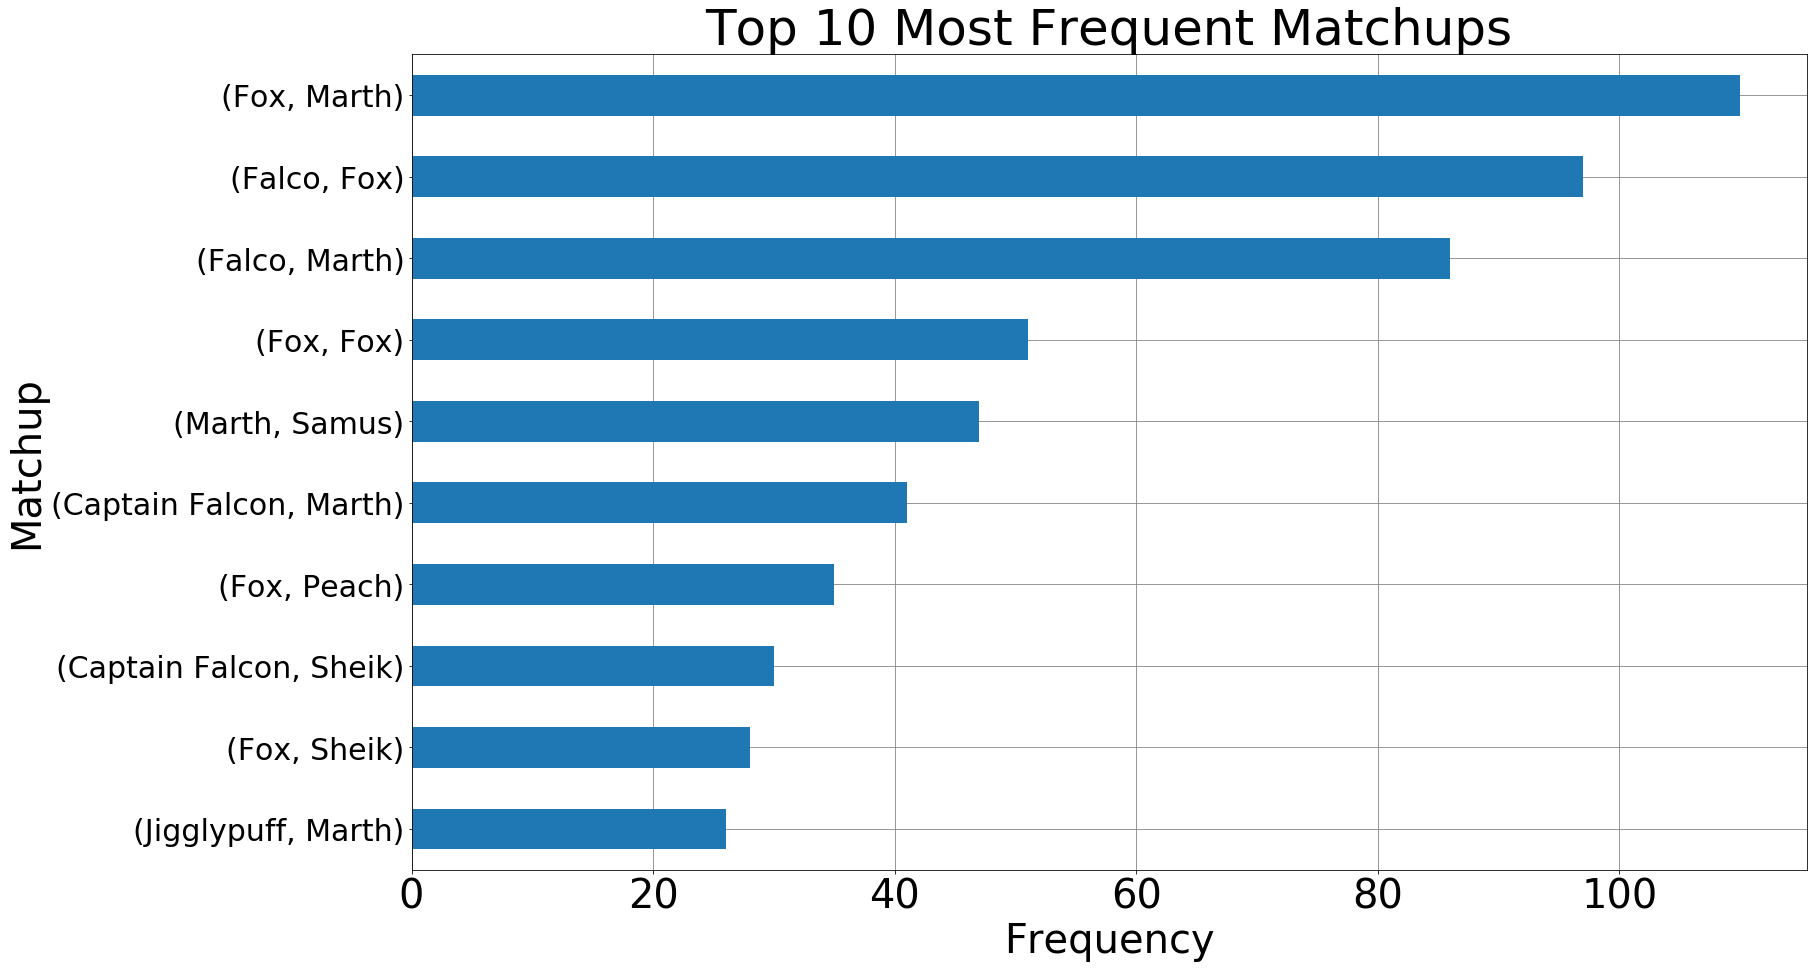

In [108]:
fig, ax = plt.subplots(figsize = (25, 15))
matchup_count[-10:].plot(kind = 'barh', ax = ax)
ax.set_axisbelow(True)
ax.grid(color = 'grey')
ax.set_title('Top 10 Most Frequent Matchups', size = 50)
ax.set_xlabel('Frequency', size = 40)
ax.set_ylabel('Matchup', size  = 40)
ax.tick_params(axis = 'x', labelsize = 40)
ax.tick_params(axis = 'y', labelsize = 30)



In [8]:
stages = {
    2: 'Fountain of Dreams',
    3: 'Pokemon Stadium',
    4: "Princess Peach's Castle",
    5: 'Kongo Jungle',
    6: 'Brinstar',
    7: 'Corneria',
    8: "Yoshi's Story",
    9: 'Onett',
    10: 'Mute City',
    11: 'Rainbow Cruise',
    12: 'Jungle Japes',
    13: 'Great Bay',
    14: 'Hyrule Temple',
    15: 'Brinstar Depths',
    16: "Yoshi's Island",
    17: 'Green Greens',
    18: 'Fourside',
    19: 'Mushroom Kingdom I',
    20: 'Mushroom Kingdom II',
    22: 'Venom',
    23: 'Poke Floats',
    24: 'Big Blue',
    25: 'Icicle Mountain',
    26: 'Icetop',
    27: 'Flat Zone',
    28: 'Dream Land 64',
    29: "Yoshi's Island 64",
    30: 'Kongo Jungle 64',
    31: 'Battlefield',
    32: 'Final Destination'
}

df_fp9['stage_name'] = df_fp9['stage'].map(stages)
df_fp9

,date,duration,platform,p1_port,p1_char,p2_port,p2_char,stage,is_teams,is_pal,p1_char_name,p2_char_name,stage_name
game_id,,,,,,,,,,,,,
20190406T182021,2019-04-06 18:20:21+00:00,11653,Platform.NINTENDONT,0,14,3,9,32,False,False,Ice Climbers,Marth,Final Destination
20190406T054329,2019-04-06 05:43:29+00:00,1435,Platform.NINTENDONT,1,20,2,18,31,False,False,Falco,Zelda,Battlefield
20190406T113710,2019-04-06 11:37:10+00:00,7577,Platform.NINTENDONT,0,22,1,2,3,True,False,Dr. Mario,Fox,Pokemon Stadium
20190406T060932,2019-04-06 06:09:32+00:00,9589,Platform.NINTENDONT,0,20,3,7,28,False,False,Falco,Luigi,Dream Land 64
20190406T063208,2019-04-06 06:32:08+00:00,10043,Platform.NINTENDONT,0,14,3,9,8,False,False,Ice Climbers,Marth,Yoshi's Story
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20190406T060724,2019-04-06 06:07:24+00:00,4462,Platform.NINTENDONT,0,20,1,20,31,False,False,Falco,Falco,Battlefield
20190406T175301,2019-04-06 17:53:01+00:00,12113,Platform.NINTENDONT,0,19,1,0,32,False,False,Sheik,Captain Falcon,Final Destination
20190406T152033,2019-04-06 15:20:33+00:00,11529,Platform.NINTENDONT,0,22,3,19,28,False,False,Dr. Mario,Sheik,Dream Land 64


In [10]:
df_fp9['p1_port'].value_counts()

0    763
1    220
2    163
Name: p1_port, dtype: int64

In [11]:
all_ports = df_fp9['p1_port'].value_counts().append(df_fp9['p2_port'].value_counts())
all_ports

0    763
1    220
2    163
3    800
1    202
2    144
dtype: int64

In [12]:
all_ports = all_ports.groupby(all_ports.index).sum()
all_ports

0    763
1    422
2    307
3    800
dtype: int64

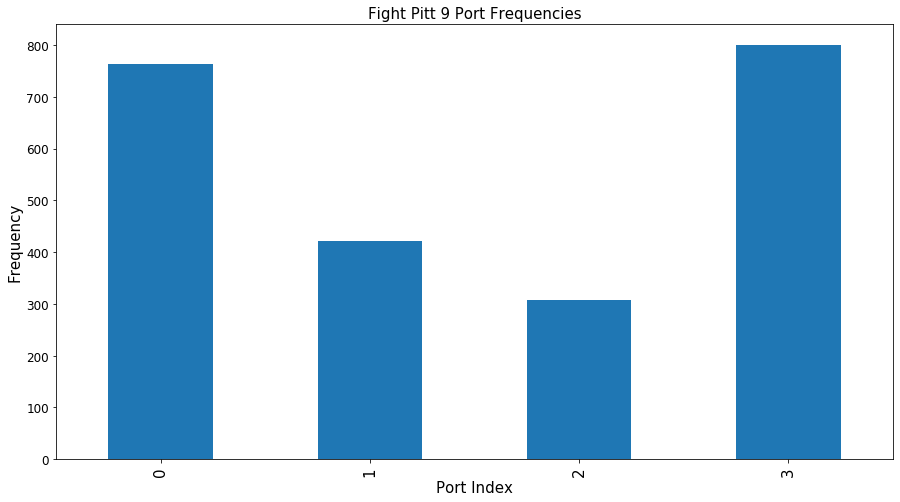

In [13]:
plt.figure(figsize = (15, 8));
plt.title('Fight Pitt 9 Port Frequencies', size = 15);
plt.xlabel('Port Index', size = 15);
plt.xticks(size = 15);
plt.ylabel('Frequency', size = 15);
plt.yticks(size = 12);
all_ports.plot(kind = 'bar');

In [14]:
set(df_fp9['stage_name'])

{'Battlefield',
 'Dream Land 64',
 'Final Destination',
 'Fountain of Dreams',
 'Hyrule Temple',
 'Mushroom Kingdom II',
 'Pokemon Stadium',
 "Yoshi's Story"}

In [15]:
def stage_port_freq(stage_name):
    '''
    stage_name (str): Name of stage
    returns port frequencies on the specified stage
    
    Tournament Legal Stages:
    - Pokemon Stadium
    - Yoshi's Story
    - Fountain of Dreams
    - Dream Land 64
    - Battlefield
    - Final Destination
    '''
    df = df_fp9.loc[df_fp9['stage_name'] == stage_name]
    ports = df['p1_port'].value_counts().append(df['p2_port'].value_counts())
    return ports.groupby(ports.index).sum()

def plot_ports(stage):
    stage_ports = stage_port_freq(stage)
    plt.figure(figsize = (20, 12))
    plt.title(f'Port Frequencies on {stage}', size = 30)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.xlabel('Frequency', size = 20)
    plt.ylabel('Port Index', size = 20)
    stage_ports.plot(kind = 'barh')

In [30]:
ps_ports = stage_port_freq('Pokemon Stadium')
ps_ports

0    95
1    65
2    44
3    94
dtype: int64

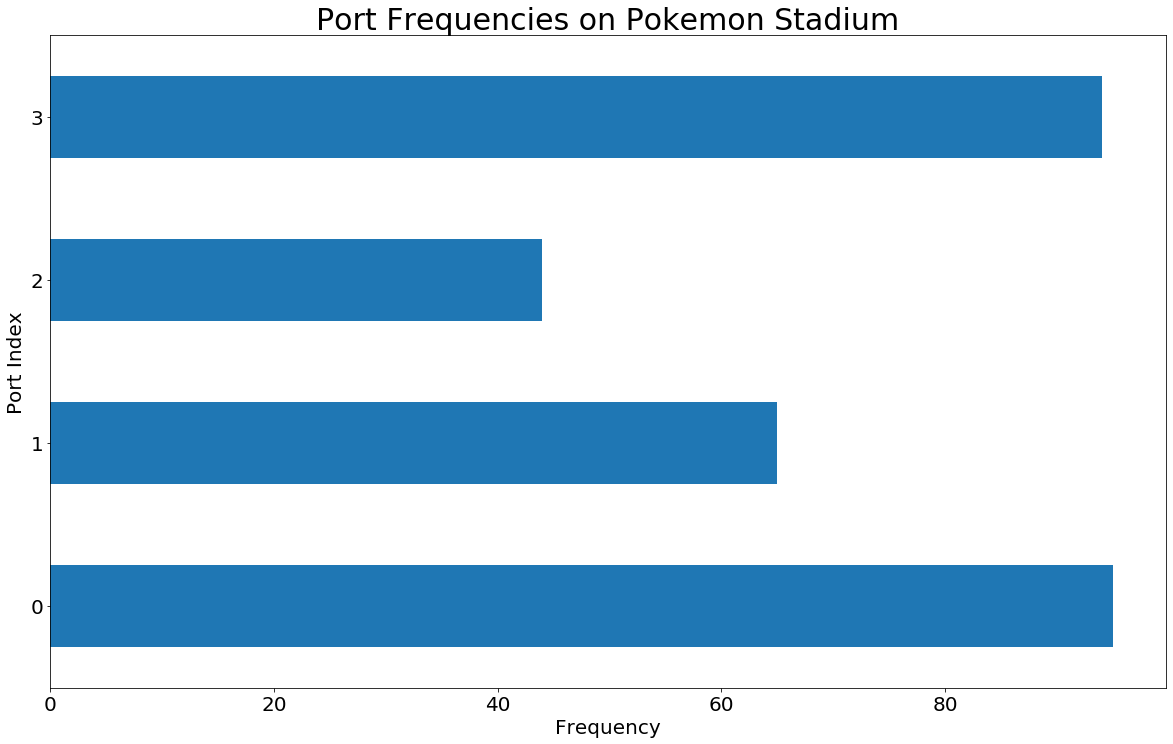

In [17]:
ps_ports_plot = plot_ports('Pokemon Stadium')
ps_ports_plot

In [32]:
ys_ports = stage_port_freq("Yoshi's Story")
ys_ports

0    117
1     73
2     39
3    121
dtype: int64

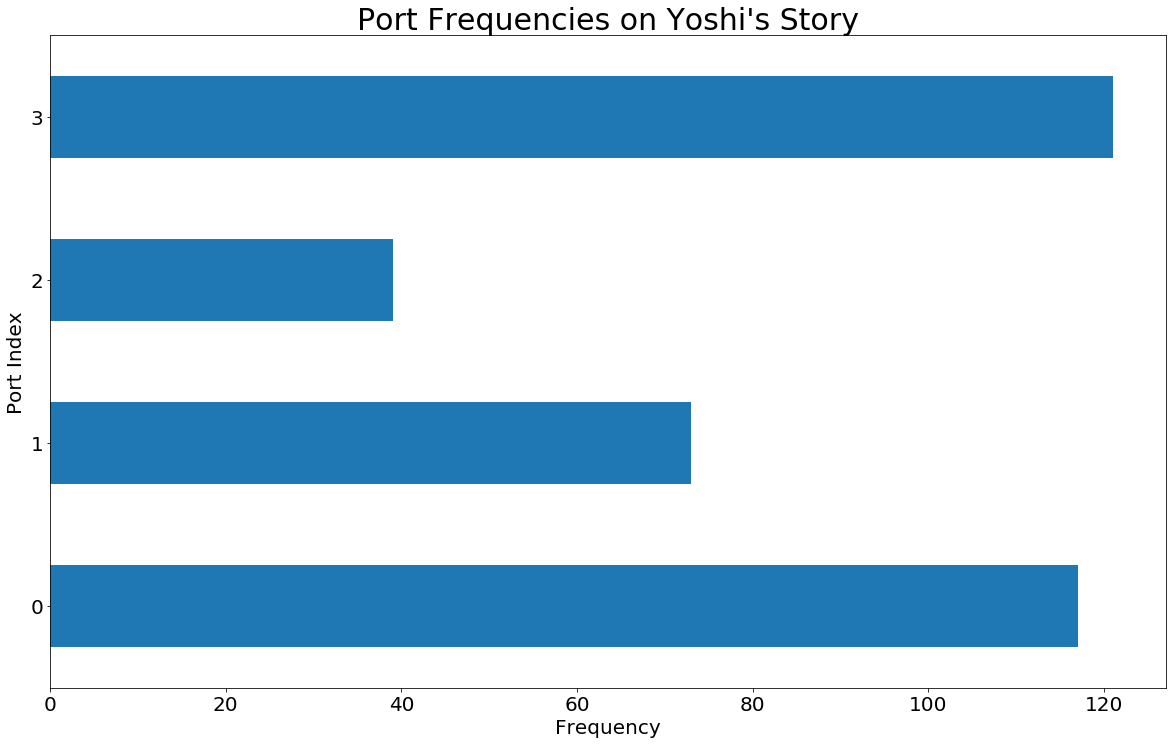

In [19]:
ys_ports_plot = plot_ports("Yoshi's Story")
ys_ports_plot

In [20]:
fod_ports = stage_port_freq('Fountain of Dreams')
fod_ports

0     89
1     57
2     35
3    121
dtype: int64

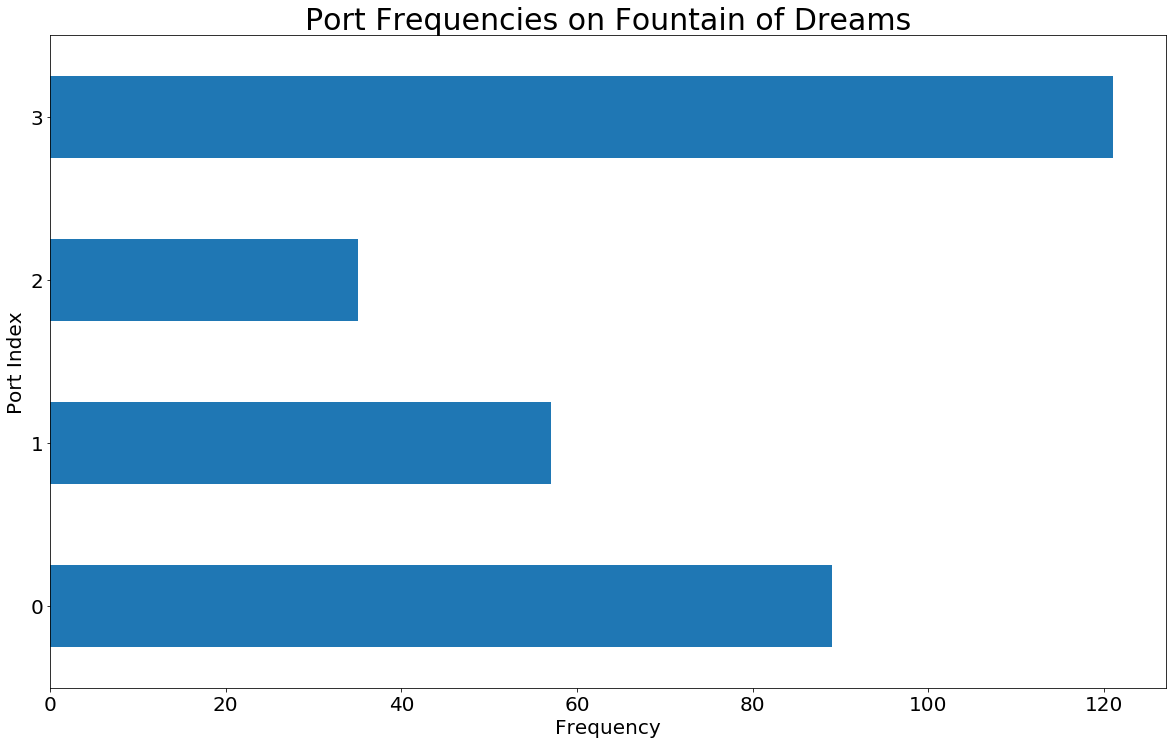

In [21]:
fod_ports_plot = plot_ports('Fountain of Dreams')
fod_ports_plot

In [22]:
dl_ports = stage_port_freq('Dream Land 64')
dl|_ports

0    129
1     64
2     53
3    126
dtype: int64

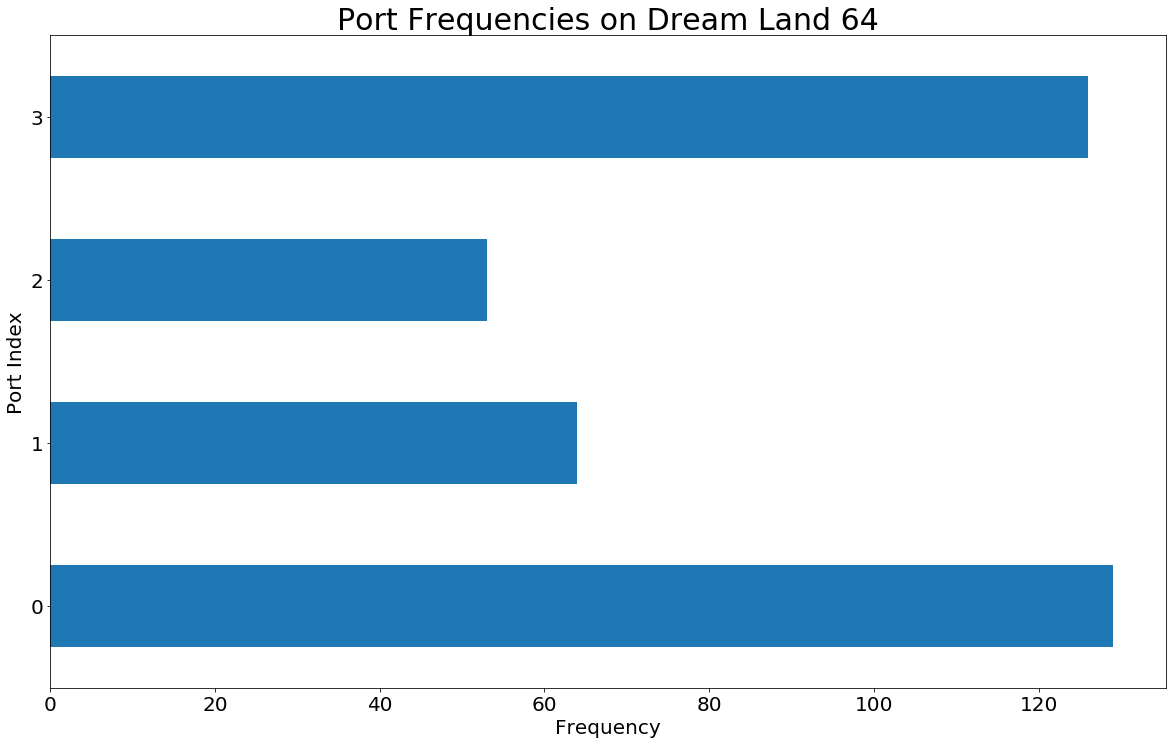

In [23]:
dl_ports_plot = plot_ports('Dream Land 64')
dl_ports_plot

In [24]:
bf_ports = stage_port_freq('Battlefield')
bf_ports

0    196
1     88
2     78
3    194
dtype: int64

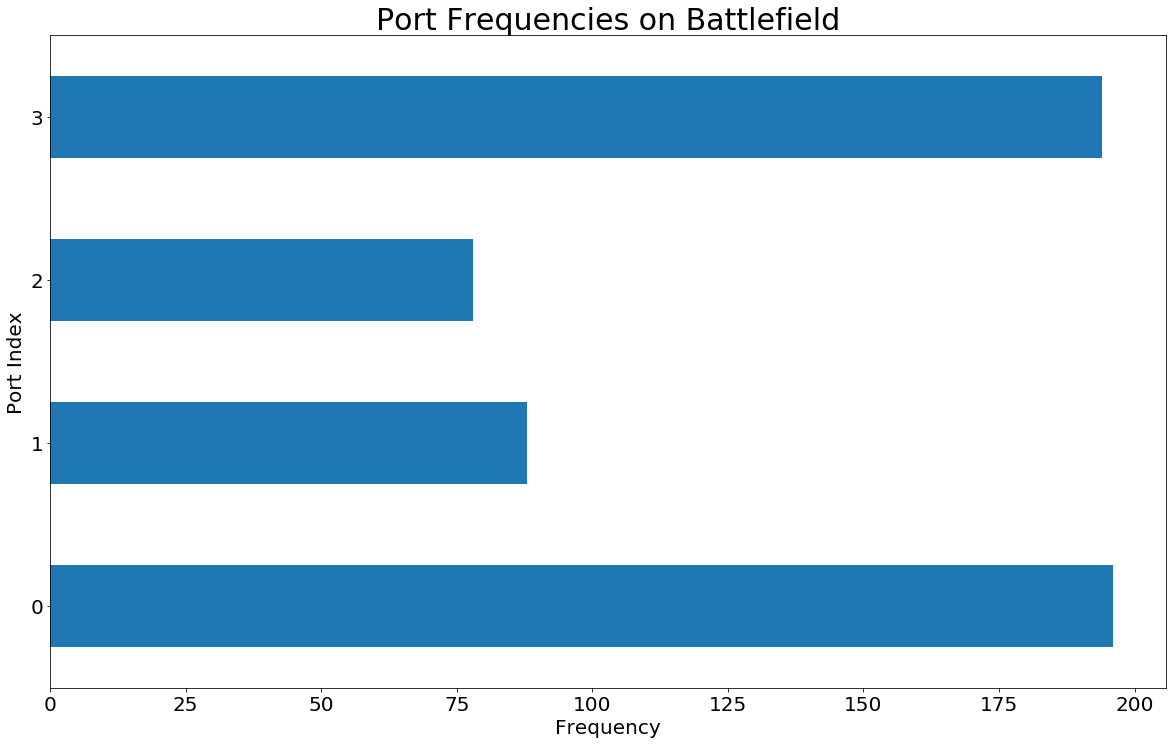

In [25]:
bf_ports_plot = plot_ports('Battlefield')
bf_ports_plot

In [26]:
fd_ports = stage_port_freq('Final Destination')
fd_ports

0    137
1     74
2     56
3    143
dtype: int64

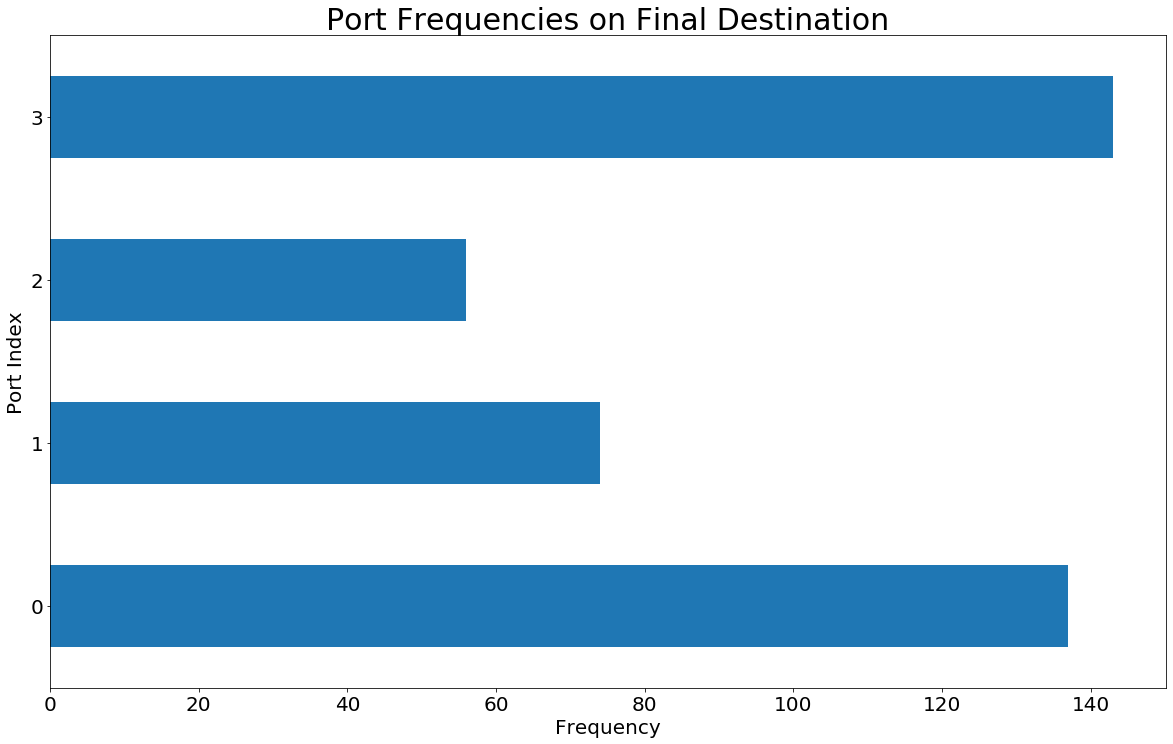

In [27]:
fd_ports_plot = plot_ports('Final Destination')
fd_ports_plot

NameError: name 'dl_ports' is not defined

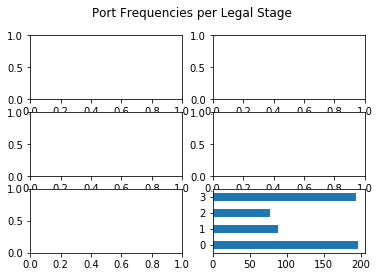

In [33]:
fig, axs = plt.subplots(3, 2)
fig.suptitle('Port Frequencies per Legal Stage')
axs[0,0] = fd_ports.plot(kind = 'barh')
axs[0,1] = bf_ports.plot(kind = 'barh')
axs[1,0] = ps_ports.plot(kind = 'barh')
axs[1,1] = ys_ports.plot(kind = 'barh')
axs[2,0] = dl_ports.plot(kind = 'barh')
axs[2,1] = fod_ports.plot(kind = 'barh')

In [1]:
plt.figure(figsize = (15, 8));

plt.title('Battlefield Port Frequencies', size = 20);
plt.xlabel('Port Index', size = 15);
plt.xticks(size = 15);
plt.ylabel('Frequency', size = 15);
plt.yticks(size = 12);

all_ports.plot(kind = 'bar', color = 'black')
# poke_ports.plot(kind = 'bar', color = 'green')
# yoshis_ports.plot(kind = 'bar', color = 'red')
# fod_ports.plot(kind = 'bar', color = 'pink')
# dland_ports.plot(kind = 'bar', color = 'yellow')
# bf_ports.plot(kind = 'bar', color = 'blue')
# fd_ports.plot(kind = 'bar', color = 'purple')


plt.legend(['All', 'Pokemon Stadium']);

NameError: name 'plt' is not defined

In [ ]:
chars = df_fp9['p1_char_name'].value_counts().append(df_fp9['p2_char_name'].value_counts())
chars = chars.groupby(chars.index).sum().sort_values(ascending = False)
chars

In [ ]:
plt.figure(figsize = (15, 8));

plt.title('Character Frequencies', size = 20);
plt.xlabel('Character', size = 15);
plt.xticks(size = 15);
plt.ylabel('Frequency', size = 15);
plt.yticks(size = 12);
chars.plot(kind = 'bar')

In [ ]:
matchups = df_fp9[['p1_char_name', 'p2_char_name']].values
matchups

In [ ]:
matchups = df_fp9[['p1_char_name', 'p2_char_name']].values
matchups = [sorted((matchup[0], matchup[1])) for matchup in matchups]
matchups = [(matchup[0], matchup[1]) for matchup in matchups]
set(matchups)

In [30]:
matchup_freq = {matchup: matchups.count(matchup) for matchup in set(matchups)}
matchup_freq

{('Game and Watch', 'Marth'): 1,
 ('Ganondorf', 'Mario'): 1,
 ('Ganondorf', 'Samus'): 3,
 ('Marth', 'Pikachu'): 1,
 ('Falco', 'Link'): 10,
 ('Falco', 'Roy'): 1,
 ('Ice Climbers', 'Sheik'): 2,
 ('Link', 'Luigi'): 2,
 ('Luigi', 'Samus'): 4,
 ('Falco', 'Peach'): 2,
 ('Peach', 'Sheik'): 4,
 ('Luigi', 'Mario'): 1,
 ('Ness', 'Young Link'): 1,
 ('Mewtwo', 'Ness'): 1,
 ('Captain Falcon', 'Falco'): 25,
 ('Falco', 'Samus'): 22,
 ('Luigi', 'Peach'): 1,
 ('Ness', 'Samus'): 1,
 ('Dr. Mario', 'Luigi'): 1,
 ('Falco', 'Luigi'): 8,
 ('Captain Falcon', 'Ice Climbers'): 4,
 ('Game and Watch', 'Ness'): 1,
 ('Samus', 'Sheik'): 3,
 ('Game and Watch', 'Peach'): 1,
 ('Captain Falcon', 'Captain Falcon'): 10,
 ('Fox', 'Zelda'): 2,
 ('Fox', 'Fox'): 51,
 ('Peach', 'Roy'): 1,
 ('Donkey Kong', 'Marth'): 15,
 ('Ice Climbers', 'Peach'): 2,
 ('Captain Falcon', 'Donkey Kong'): 6,
 ('Dr. Mario', 'Pikachu'): 3,
 ('Donkey Kong', 'Yoshi'): 11,
 ('Ganondorf', 'Marth'): 20,
 ('Game and Watch', 'Ganondorf'): 1,
 ('Jigglypuff'

In [31]:
matchup_freq[('Captain Falcon', 'Samus')]

9

In [32]:
list(map(lambda val: sorted(val), matchups))

[['Ice Climbers', 'Marth'],
 ['Falco', 'Zelda'],
 ['Dr. Mario', 'Fox'],
 ['Falco', 'Luigi'],
 ['Ice Climbers', 'Marth'],
 ['Samus', 'Samus'],
 ['Ganondorf', 'Sheik'],
 ['Fox', 'Fox'],
 ['Falco', 'Fox'],
 ['Falco', 'Luigi'],
 ['Captain Falcon', 'Fox'],
 ['Falco', 'Marth'],
 ['Falco', 'Fox'],
 ['Fox', 'Marth'],
 ['Fox', 'Fox'],
 ['Captain Falcon', 'Samus'],
 ['Captain Falcon', 'Marth'],
 ['Captain Falcon', 'Sheik'],
 ['Captain Falcon', 'Samus'],
 ['Fox', 'Zelda'],
 ['Fox', 'Peach'],
 ['Fox', 'Marth'],
 ['Peach', 'Peach'],
 ['Falco', 'Falco'],
 ['Yoshi', 'Zelda'],
 ['Marth', 'Samus'],
 ['Marth', 'Marth'],
 ['Fox', 'Marth'],
 ['Captain Falcon', 'Samus'],
 ['Luigi', 'Mario'],
 ['Falco', 'Ganondorf'],
 ['Falco', 'Link'],
 ['Peach', 'Zelda'],
 ['Falco', 'Falco'],
 ['Falco', 'Sheik'],
 ['Captain Falcon', 'Samus'],
 ['Donkey Kong', 'Marth'],
 ['Captain Falcon', 'Falco'],
 ['Captain Falcon', 'Jigglypuff'],
 ['Captain Falcon', 'Jigglypuff'],
 ['Dr. Mario', 'Yoshi'],
 ['Falco', 'Falco'],
 ['Luigi'

In [33]:
{matchup: 0 for matchup in set(matchups)}

{('Game and Watch', 'Marth'): 0,
 ('Ganondorf', 'Mario'): 0,
 ('Ganondorf', 'Samus'): 0,
 ('Marth', 'Pikachu'): 0,
 ('Falco', 'Link'): 0,
 ('Falco', 'Roy'): 0,
 ('Ice Climbers', 'Sheik'): 0,
 ('Link', 'Luigi'): 0,
 ('Luigi', 'Samus'): 0,
 ('Falco', 'Peach'): 0,
 ('Peach', 'Sheik'): 0,
 ('Luigi', 'Mario'): 0,
 ('Ness', 'Young Link'): 0,
 ('Mewtwo', 'Ness'): 0,
 ('Captain Falcon', 'Falco'): 0,
 ('Falco', 'Samus'): 0,
 ('Luigi', 'Peach'): 0,
 ('Ness', 'Samus'): 0,
 ('Dr. Mario', 'Luigi'): 0,
 ('Falco', 'Luigi'): 0,
 ('Captain Falcon', 'Ice Climbers'): 0,
 ('Game and Watch', 'Ness'): 0,
 ('Samus', 'Sheik'): 0,
 ('Game and Watch', 'Peach'): 0,
 ('Captain Falcon', 'Captain Falcon'): 0,
 ('Fox', 'Zelda'): 0,
 ('Fox', 'Fox'): 0,
 ('Peach', 'Roy'): 0,
 ('Donkey Kong', 'Marth'): 0,
 ('Ice Climbers', 'Peach'): 0,
 ('Captain Falcon', 'Donkey Kong'): 0,
 ('Dr. Mario', 'Pikachu'): 0,
 ('Donkey Kong', 'Yoshi'): 0,
 ('Ganondorf', 'Marth'): 0,
 ('Game and Watch', 'Ganondorf'): 0,
 ('Jigglypuff', 'Roy')

In [34]:
df_frames = pd.read_csv('../data/fp9_frames.csv')
df_frames.head()

,Unnamed: 0,game_id,frame_index,fox_cstick_x,fox_cstick_y,fox_joystick_x,fox_joystick_y,fox_trigger_analog,fox_Start,fox_Y,...,nfox_combo_count,nfox_dmg,nfox_direction,nfox_last_hit_by,nfox_position_x,nfox_position_y,nfox_shield,nfox_state,nfox_state_age,nfox_stocks
0,0,20190406T144505,-123,0.0,0.0,0.0,0.0,0,0,0,...,0,0.0,1,NaN,-60.0,10.0,60.0,322,-1.0,4
1,1,20190406T144505,-122,0.0,0.0,0.0,0.0,0,0,0,...,0,0.0,1,NaN,-60.0,10.0,60.0,322,-1.0,4
2,2,20190406T144505,-121,0.0,0.0,0.0,0.0,0,0,0,...,0,0.0,1,NaN,-60.0,10.0,60.0,322,-1.0,4
3,3,20190406T144505,-120,0.0,0.0,0.0,0.0,0,0,0,...,0,0.0,1,NaN,-60.0,10.0,60.0,322,-1.0,4
4,4,20190406T144505,-119,0.0,0.0,0.0,0.0,0,0,0,...,0,0.0,1,NaN,-60.0,10.0,60.0,322,-1.0,4


In [35]:
df_frames.drop(columns = ['Unnamed: 0'], inplace = True)

In [36]:
df_frames.head()

,game_id,frame_index,fox_cstick_x,fox_cstick_y,fox_joystick_x,fox_joystick_y,fox_trigger_analog,fox_Start,fox_Y,fox_X,...,nfox_combo_count,nfox_dmg,nfox_direction,nfox_last_hit_by,nfox_position_x,nfox_position_y,nfox_shield,nfox_state,nfox_state_age,nfox_stocks
0,20190406T144505,-123,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0.0,1,NaN,-60.0,10.0,60.0,322,-1.0,4
1,20190406T144505,-122,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0.0,1,NaN,-60.0,10.0,60.0,322,-1.0,4
2,20190406T144505,-121,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0.0,1,NaN,-60.0,10.0,60.0,322,-1.0,4
3,20190406T144505,-120,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0.0,1,NaN,-60.0,10.0,60.0,322,-1.0,4
4,20190406T144505,-119,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0.0,1,NaN,-60.0,10.0,60.0,322,-1.0,4


In [37]:
ff_games = list(set(df_frames['game_id']))
ff_games

['20190406T214523',
 '20190406T144505',
 '20190406T190420',
 '20190406T105900',
 '20190406T114529',
 '20190406T114015',
 '20190406T104203',
 '20190406T102328',
 '20190406T175827',
 '20190309T012347',
 '20190406T143503',
 '20190406T190322',
 '20190406T183745']

In [38]:
df_frames.loc[df_frames['game_id'] == ff_games[0]]

,game_id,frame_index,fox_cstick_x,fox_cstick_y,fox_joystick_x,fox_joystick_y,fox_trigger_analog,fox_Start,fox_Y,fox_X,...,nfox_combo_count,nfox_dmg,nfox_direction,nfox_last_hit_by,nfox_position_x,nfox_position_y,nfox_shield,nfox_state,nfox_state_age,nfox_stocks
45805,20190406T214523,-123,0.0,0.0,-0.5875,0.8000,0,0,0,0,...,0,0.0,1,NaN,-60.000000,10.0000,60.0,322,-1.0,4
45806,20190406T214523,-122,0.0,0.0,-0.7500,0.6500,0,0,0,0,...,0,0.0,1,NaN,-60.000000,10.0000,60.0,322,-1.0,4
45807,20190406T214523,-121,0.0,0.0,-0.9625,0.0000,0,0,0,0,...,0,0.0,1,NaN,-60.000000,10.0000,60.0,322,-1.0,4
45808,20190406T214523,-120,0.0,0.0,-0.9625,0.0000,0,0,0,0,...,0,0.0,1,NaN,-60.000000,10.0000,60.0,322,-1.0,4
45809,20190406T214523,-119,0.0,0.0,-0.7000,-0.7000,0,0,0,0,...,0,0.0,1,NaN,-60.000000,10.0000,60.0,322,-1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52020,20190406T214523,6092,0.0,0.0,0.0000,0.0000,0,0,0,0,...,1,13.0,1,NaN,31.077560,0.0001,60.0,24,0.0,2
52021,20190406T214523,6093,0.0,0.0,0.0000,0.0000,0,0,0,0,...,1,13.0,1,NaN,32.246937,0.0001,60.0,24,1.0,2
52022,20190406T214523,6094,0.0,0.0,0.0000,0.0000,0,0,0,0,...,1,13.0,1,NaN,33.336311,0.0001,60.0,24,2.0,2
52023,20190406T214523,6095,0.0,0.0,0.5125,-0.4125,0,0,0,0,...,1,13.0,1,NaN,34.345688,0.0001,60.0,24,3.0,2


In [39]:
# create a list of tuples where the first item is the stage name
# and the second item is the total number of frames played on that stage
# with at least one Fox
stage_frame_total = [(stage, sum(df_fox.loc[(df_fox['stage_name'] == stage), 'duration'])) for stage in set(df_fox['stage_name'].values)]
stage_frame_total

NameError: name 'df_fox' is not defined

In [40]:
sorted(stage_frame_total, key = lambda val: val[1])

NameError: name 'stage_frame_total' is not defined

Now I want to get a frequency of each matchup. For example, how many matches did a Fox player fight another Fox player? How many matches did a Fox player fight a Captain Falcon?

In [ ]:
p1_nofox_counts = df_fox.loc[df_fox['p1_char_name'] != 'Fox', 'p1_char_name'].value_counts()
p2_nofox_counts = df_fox.loc[df_fox['p2_char_name'] != 'Fox', 'p2_char_name'].value_counts()
p1_nofox_counts

In [ ]:
p2_nofox_counts

In [ ]:
not_foxes = p2_nofox_counts.append(p1_nofox_counts)
not_foxes

In [ ]:
not_foxes.groupby(not_foxes.index).sum().sort_values(ascending = False)

In [115]:
df_ff_frames = pd.read_csv('../data/fox-falco-fd-frames.csv')
df_ff_frames.head()

In [118]:
df_ff_frames.drop(columns = ['Unnamed: 0'], inplace = True)
df_ff_frames.head()

,game_id,frame_index,fox_cstick_x,fox_cstick_y,fox_joystick_x,fox_joystick_y,fox_trigger_analog,fox_Start,fox_Y,fox_X,...,nfox_combo_count,nfox_dmg,nfox_direction,nfox_last_hit_by,nfox_position_x,nfox_position_y,nfox_shield,nfox_state,nfox_state_age,nfox_stocks
0,20190406T144505,-123,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0.0,1,NaN,-60.0,10.0,60.0,322,-1.0,4
1,20190406T144505,-122,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0.0,1,NaN,-60.0,10.0,60.0,322,-1.0,4
2,20190406T144505,-121,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0.0,1,NaN,-60.0,10.0,60.0,322,-1.0,4
3,20190406T144505,-120,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0.0,1,NaN,-60.0,10.0,60.0,322,-1.0,4
4,20190406T144505,-119,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0.0,1,NaN,-60.0,10.0,60.0,322,-1.0,4


In [122]:
df_ff_frames.columns

Index(['game_id', 'frame_index', 'fox_cstick_x', 'fox_cstick_y',
       'fox_joystick_x', 'fox_joystick_y', 'fox_Y', 'fox_X', 'fox_B', 'fox_A',
       'fox_L', 'fox_R', 'fox_Z', 'fox_combo_count', 'fox_dmg',
       'fox_direction', 'fox_last_hit_by', 'fox_position_x', 'fox_position_y',
       'fox_shield', 'fox_state', 'fox_state_age', 'fox_stocks',
       'nfox_cstick_x', 'nfox_cstick_y', 'nfox_joystick_x', 'nfox_joystick_y',
       'nfox_Y', 'nfox_X', 'nfox_B', 'nfox_A', 'nfox_L', 'nfox_R', 'nfox_Z',
       'nfox_combo_count', 'nfox_dmg', 'nfox_direction', 'nfox_last_hit_by',
       'nfox_position_x', 'nfox_position_y', 'nfox_shield', 'nfox_state',
       'nfox_state_age', 'nfox_stocks'],
      dtype='object')

In [124]:
pd.get_dummies(df_ff_frames, columns = ['fox_direction', 'nfox_direction', 'fox_state', 'nfox_state'], inplace = True)
df_ff_frames.head()

In [125]:
len(df_ff_frames.columns)

346